# Here is a real use of the cubic grid search. I use the grid to find starting parameters for the compound Sr2PrO4 which has tetragonal symmetry. The starting parameters will then be used in the file "Crystal Field Analysis".

In [6]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.append('../../')
from JensenTools import *
import numpy as np
import matplotlib.pyplot as plt
import PyCrystalField as cef
import os
import scipy.io as sio
from functools import reduce
# import time

saveDir = getSaveDir() + 'cubic_matrix_LS/' 

### Define the measured energy levels (from INS data) and define an allowable tolerance between calculated and measured energy.

In [7]:
tol = .025 #tolerance allowed between measured and calculated energy.
Emeas = [168, 335,385] # Our measured levels of Sr2PrO4
comp = 'Sr2PrO4' #Compound name

### In the following section we scan through all LS grids and find the (x,bpf) points that create matching energy levels.

Energies as measured by paper (meV):   [168, 335, 385]
800

Parameter search for:   Compound:  Sr2PrO4  at  LS = 60 meV with 0.025 tolerance.
!!! Compatibilities Found !!!
With x =  0.14893617021276606  and bpf =  0.12140175219023774
E1 =  163.99375794693282 meV
E2 =  343.3377179839799 meV
E3 =  378.4175071739888 meV
E4 =  436.6664462153125 meV


For  LS = 60 meV

For  Sr2PrO4  at x[459] = 0.1489 and bpf[448] = 0.1214
Using these values lets construct the CF Hamiltonian


 Eigenvalues 	 Eigenvectors
		---------------------------------------------------------------------------------------------------------
0.00000 	|  [ 0.     0.     0.    -0.794  0.185  0.     0.     0.     0.     0.
  0.     0.56  -0.143  0.   ]  |
0.00000 	|  [ 0.    -0.143  0.56   0.     0.     0.     0.     0.     0.     0.185
 -0.794  0.     0.     0.   ]  |
163.99376 	|  [ 0.     0.     0.    -0.233  0.376  0.     0.     0.     0.     0.
  0.    -0.233  0.866  0.   ]  |
163.99376 	|  [ 0.     0.866 -0.233  0.    

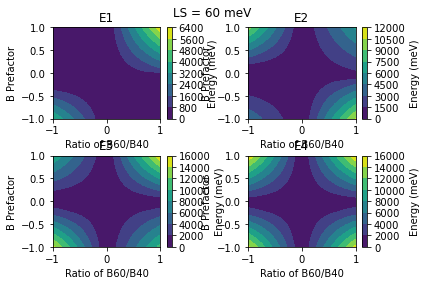

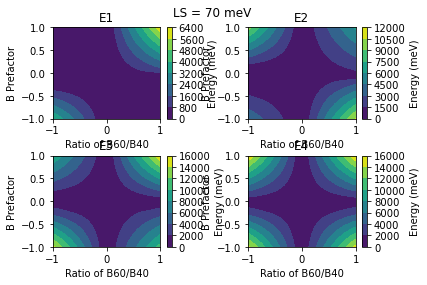

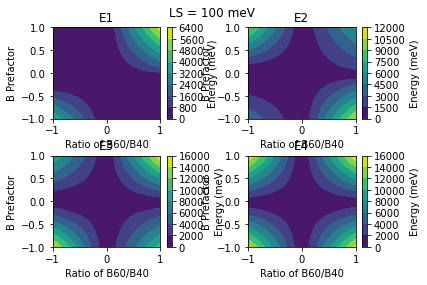

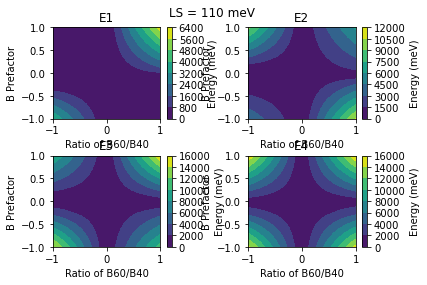

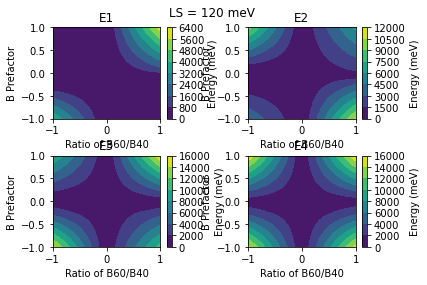

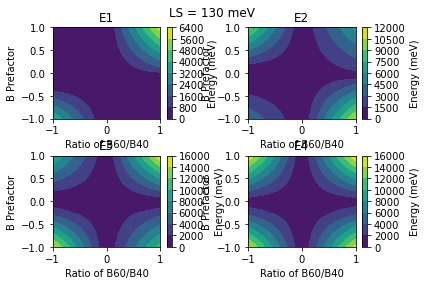

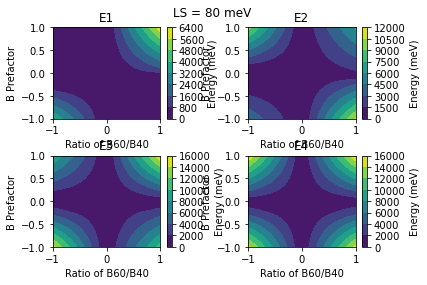

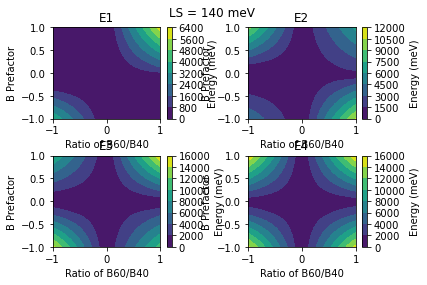

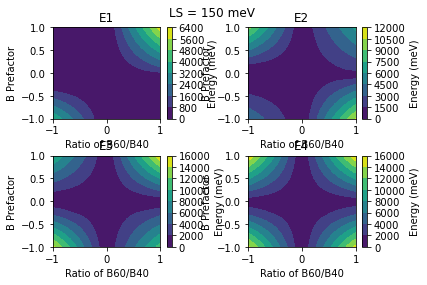

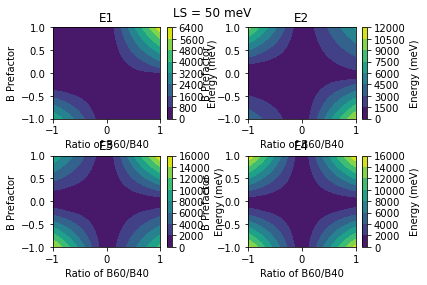

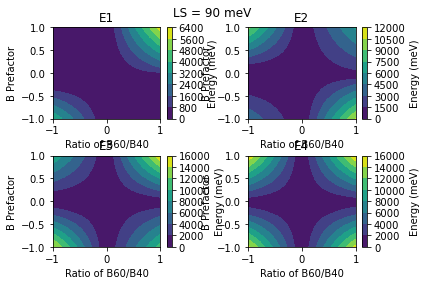

In [8]:
print('Energies as measured by paper (meV):  ', Emeas)

LSNames, EList, data = loadMatrixLS(saveDir) #Load in all created 800x800 grids
# LSNames = [LSNames[0]]
# EList = [EList[0]]
# data = [data[0]]
for c in range(len(LSNames)):
    
    #Loading the x,bpf, and LS of each file.
    x = data[c]['X'][0]
    bpf = data[c]['B'][0]
    LS = data[c]['LS'][0][0]

    plotContoursLS(data[c],EList[c],Emeas,LSNames[c]) #Contour plotting for 4 E levels


    #Choose which bands to look for compatibilities.
    #For since we only measure 3 magnetic modes, only search for compatibilities with energies [E1,E2,E3].
    index = [1,2,3]
    Eindex = []
    EListindex = []
    for i in index:
        Eindex.append(Emeas[i-1])
        EListindex.append(EList[c][i-1])
        
    #Function call that searches for compatible (x,bpf) coordinates.
    coords = paramFinder(data[c],EListindex,Eindex,tol,comp,LSNames[c])

    #Printing results
    if len(coords) !=0:
        for j in [coords[0]]:
            print('!!! Compatibilities Found !!!')
            print('With x = ', x[j[0]], ' and bpf = ', bpf[j[1]])
            count = 1
            for i in EList[c]:
                print('E%i = '%count, data[c][i][j[0]][j[1]], 'meV')
                count += 1
            print()
    else:
        print('No compatibilities found')

    
    #If there is a compatibility then print an example of the matrix generated by PCF with cubic constraints.
    if(len(coords) != 0):
        print('\nFor ', LSNames[c])
        xind,bind = coords[0][0], coords[0][1]

        print('\nFor ', comp, ' at x[%i] = %.4f and bpf[%i] = %.4f'%(xind,x[xind],bind,bpf[bind]))
        print('Using these values lets construct the CF Hamiltonian\n')
        printPCFEigens(x[xind],bpf[bind],LS)


### We find results for LS = 60 and LS = 100. Since Sr2PrO4 has the central ion Pr4+ which has a reported LS value of ~107meV, I decide to use the results from the LS = 100 run as my starting point for Crystal Field fitting.

LS = 100, x = 0.03629536921151444, and bpf = -0.6570713391739674